# 第一次实战：TensorFlow-Keras构建分类模型

In [1]:
# 导入
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.18.1
pandas 0.25.3
sklearn 0.22.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
# 测试 GPU
# gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
# cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
# print(gpus, cpus)
# tf.test.is_gpu_available()

## 实战开始

### 数据读取和展示

In [3]:
# 导入数据集fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


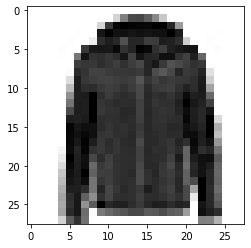

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()
    
show_single_image(x_train[0])

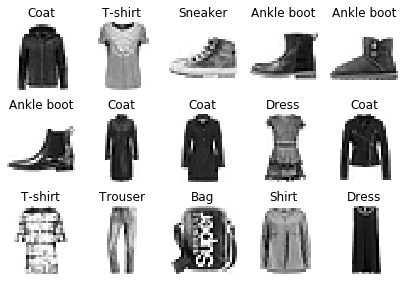

In [5]:
# 多行多列数据展示
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal',
               'Shirt','Sneaker','Bag','Ankle boot']
show_imgs(3,5,x_train,y_train,class_names)

### 模型构建
使用tf.keras.models.Sequential()构建

**激活函数：**

relu：y = max(0,x)

softmax：将向量变成概率分布，x = [x1, x2, x3] ,y = [e^x1/sum, e^x2/sum, e^x3/sum],sum = e^x1 + e^x2 + e^x3

**损失函数：**

reason for sparse_categorical_crossentropy: y->index，当y值为索引时使用sparse_categorical_crossentropy

reason for categorical_crossentropy: y->one_hot->[]，当y值为向量时使用categorical_crossentropy

In [6]:
model = keras.models.Sequential()
# 构建模型
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 模型编译，固化模型
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 查看模型网络层
model.layers

参数计算：[Node, 784] * W + b -> [None, 300]

其中：W.shape [784, 300],b = [300]

参数个数为：784 * 300 + 300 = 235500

In [8]:
# 查看模型概况
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 模型训练
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 134us/sample - loss: 2.2530 - accuracy: 0.7227 - val_loss: 0.6938 - val_accuracy: 0.7726
Epoch 2/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.6010 - accuracy: 0.7813 - val_loss: 0.6045 - val_accuracy: 0.7718
Epoch 3/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.4957 - accuracy: 0.8211 - val_loss: 0.4420 - val_accuracy: 0.8502
Epoch 4/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.4468 - accuracy: 0.8414 - val_loss: 0.4097 - val_accuracy: 0.8524
Epoch 5/10
55000/55000 [==============================] - 7s 125us/sample - loss: 0.4242 - accuracy: 0.8504 - val_loss: 0.3759 - val_accuracy: 0.8682
Epoch 6/10
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3987 - accuracy: 0.8580 - val_loss: 0.3757 - val_accuracy: 0.8662
Epoch 7/10
55000/55000 [===========================

In [10]:
type(history)

tensorflow.python.keras.callbacks.History

In [11]:
# 模型训练时的中间变化结果
history.history

{'loss': [2.252973679898002,
  0.6010384150244973,
  0.49572524303739723,
  0.44677537425648084,
  0.42422140744382686,
  0.3986935216947035,
  0.3917056222438812,
  0.37526552578969435,
  0.3625671004815535,
  0.3540918510827151],
 'accuracy': [0.7227091,
  0.78132725,
  0.82109094,
  0.84138185,
  0.8504182,
  0.85801816,
  0.8606909,
  0.8664,
  0.8702545,
  0.8739455],
 'val_loss': [0.6937596523761749,
  0.6044613958358764,
  0.44202527194023133,
  0.4097229866504669,
  0.37589818527698515,
  0.37565783894062044,
  0.36589641997814176,
  0.3913193448185921,
  0.3924978404402733,
  0.3761902744293213],
 'val_accuracy': [0.7726,
  0.7718,
  0.8502,
  0.8524,
  0.8682,
  0.8662,
  0.874,
  0.8636,
  0.8684,
  0.8736]}

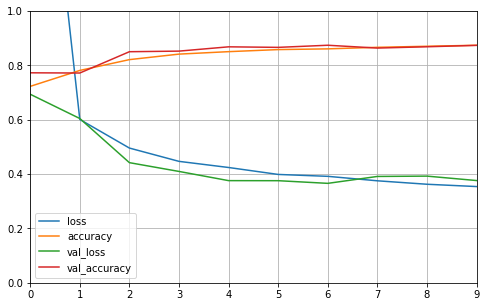

In [12]:
# 画图展示变化
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

## 数据归一化后再训练

减去均值，再除以方差：x = (x - u) / std

### 数据归一化
scaler不仅要transform，将数据归一化，而且要fit，将训练集的均值和方差保存下来，为了之后的验证集和测试集做归一化，使用的依然是训练集的均值和方差。

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [14]:
# 查看归一化后最大值和最小值
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


### 模型再训练

In [15]:
# 模型训练
history_scaled = model.fit(x_train_scaled,y_train,epochs=10,
                    validation_data=(x_valid_scaled,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 129us/sample - loss: 0.3894 - accuracy: 0.8578 - val_loss: 0.3328 - val_accuracy: 0.8808
Epoch 2/10
55000/55000 [==============================] - 7s 124us/sample - loss: 0.3062 - accuracy: 0.8872 - val_loss: 0.3364 - val_accuracy: 0.8752
Epoch 3/10
55000/55000 [==============================] - 7s 123us/sample - loss: 0.2881 - accuracy: 0.8931 - val_loss: 0.3142 - val_accuracy: 0.8866
Epoch 4/10
55000/55000 [==============================] - 7s 125us/sample - loss: 0.2709 - accuracy: 0.8999 - val_loss: 0.3214 - val_accuracy: 0.8854
Epoch 5/10
55000/55000 [==============================] - 7s 129us/sample - loss: 0.2577 - accuracy: 0.9038 - val_loss: 0.3083 - val_accuracy: 0.8892
Epoch 6/10
55000/55000 [==============================] - 7s 129us/sample - loss: 0.2466 - accuracy: 0.9069 - val_loss: 0.3148 - val_accuracy: 0.8906
Epoch 7/10
55000/55000 [===========================

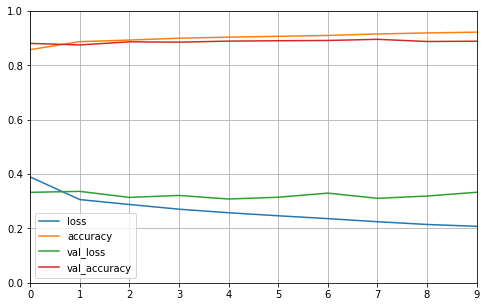

In [16]:
plot_learning_curves(history_scaled)

In [17]:
# 在测试集上进行指标评估
model.evaluate(x_test_scaled,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3678897489786148, 0.8812]

## 实战回调函数callback
Tensorboard，earlystopping，ModelCheckpoint

In [21]:
# 定义文件夹和文件
logdir = os.path.join('callbacks')
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,'fashion_mnist_model.h5')

# 定义回调函数
callbacks = [
    keras.callbacks.TensorBoard(log_dir=logdir,profile_batch = 100000000),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),
]
history_callback = model.fit(x_train_scaled,y_train,epochs=10,
                             validation_data=(x_valid_scaled,y_valid),
                             callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 155us/sample - loss: 0.1986 - accuracy: 0.9251 - val_loss: 0.3523 - val_accuracy: 0.8908
Epoch 2/10
55000/55000 [==============================] - 9s 159us/sample - loss: 0.1920 - accuracy: 0.9281 - val_loss: 0.3396 - val_accuracy: 0.8922
Epoch 3/10
55000/55000 [==============================] - 10s 175us/sample - loss: 0.1863 - accuracy: 0.9293 - val_loss: 0.3534 - val_accuracy: 0.8894
Epoch 4/10
55000/55000 [==============================] - 11s 202us/sample - loss: 0.1785 - accuracy: 0.9328 - val_loss: 0.3556 - val_accuracy: 0.8924
Epoch 5/10
55000/55000 [==============================] - 13s 236us/sample - loss: 0.1725 - accuracy: 0.9354 - val_loss: 0.3925 - val_accuracy: 0.8868
Epoch 6/10
55000/55000 [==============================] - 16s 285us/sample - loss: 0.1677 - accuracy: 0.9378 - val_loss: 0.3690 - val_accuracy: 0.8868
Epoch 7/10
55000/55000 [=======================